In [2]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [3]:
#converting dataset to dataframe

data = pd.read_csv('nifty_historical_data.csv')
data.head(5)
                   

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0


In [4]:
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
3987,2023-12-22,21295.849609,21390.500000,21232.449219,21349.400391,21349.400391,284700
3988,2023-12-26,21365.199219,21477.150391,21329.449219,21441.349609,21441.349609,219500
3989,2023-12-27,21497.650391,21675.750000,21495.800781,21654.750000,21654.750000,256500
3990,2023-12-28,21715.000000,21801.449219,21678.000000,21778.699219,21778.699219,393100
3991,2023-12-29,21737.650391,21770.300781,21676.900391,21731.400391,21731.400391,270900


In [5]:
#checking for null values in data
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3992 entries, 0 to 3991
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3992 non-null   object 
 1   Open       3992 non-null   float64
 2   High       3992 non-null   float64
 3   Low        3992 non-null   float64
 4   Close      3992 non-null   float64
 5   Adj Close  3992 non-null   float64
 6   Volume     3992 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 218.4+ KB


In [7]:
data['Date']= pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3992 entries, 0 to 3991
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3992 non-null   datetime64[ns]
 1   Open       3992 non-null   float64       
 2   High       3992 non-null   float64       
 3   Low        3992 non-null   float64       
 4   Close      3992 non-null   float64       
 5   Adj Close  3992 non-null   float64       
 6   Volume     3992 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 218.4 KB


In [8]:
data.set_index('Date', inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0
...,...,...,...,...,...,...
2023-12-22,21295.849609,21390.500000,21232.449219,21349.400391,21349.400391,284700
2023-12-26,21365.199219,21477.150391,21329.449219,21441.349609,21441.349609,219500
2023-12-27,21497.650391,21675.750000,21495.800781,21654.750000,21654.750000,256500


In [9]:
(data['Close']==data['Adj Close']).sum()

3992

In [10]:
data.drop(['Adj Close'], axis=1, inplace=True)
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0


<Axes: xlabel='Date'>

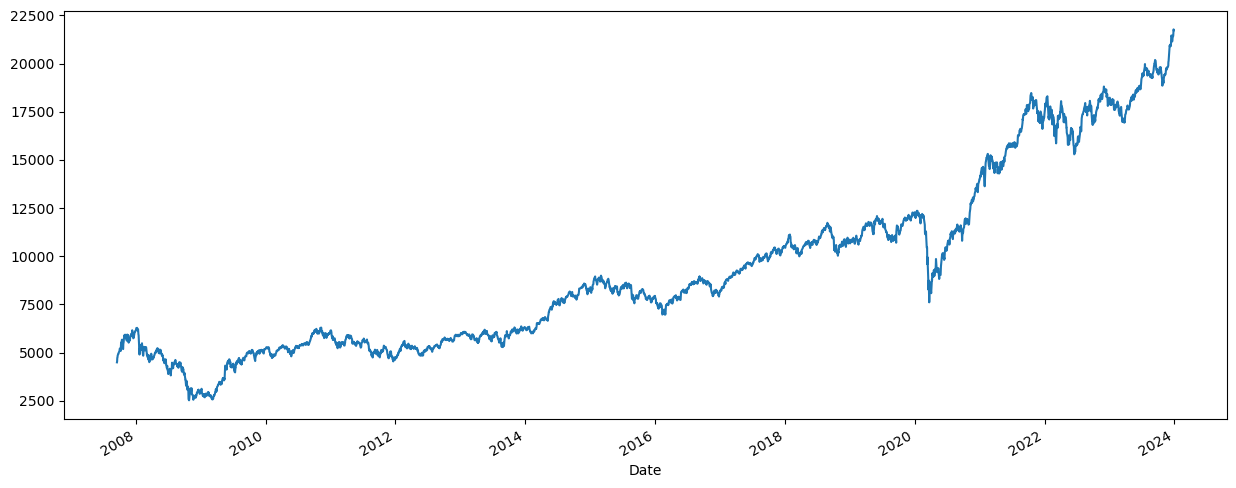

In [11]:
data['Close'].plot(figsize=(15,6))

In [12]:
#Augmented dicky fuller test

from statsmodels.tsa.stattools import adfuller

In [13]:
#close lag by 1
data['close lag by 1'] = data['Close']- data['Close'].shift(1)

In [14]:
result=adfuller(data['close lag by 1'].dropna())
if result[1] <=0.05:
        print('strong evidence against null-hypothesis, reject null-hypothesis.\nData has no unit root and is stationary')
else:
        print('weak evidence to reject null hypothesis, accept null-hypothesis.\nData has unit root and is non-stationary') 

strong evidence against null-hypothesis, reject null-hypothesis.
Data has no unit root and is stationary


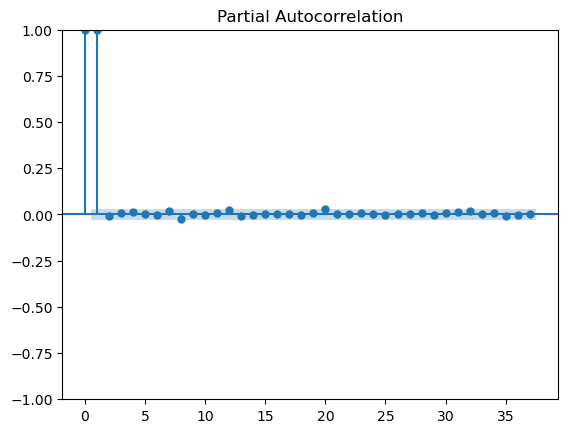

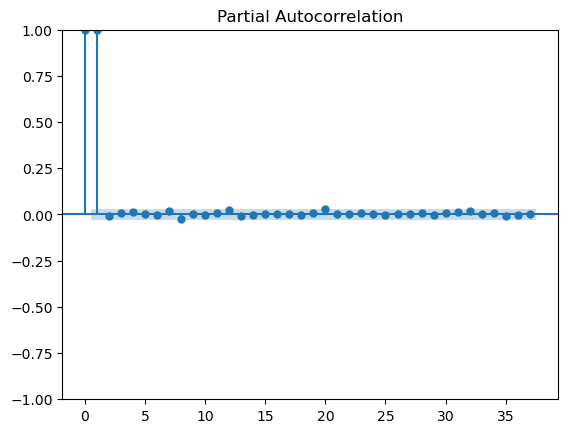

In [15]:
#arima model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(data['Close'].dropna())

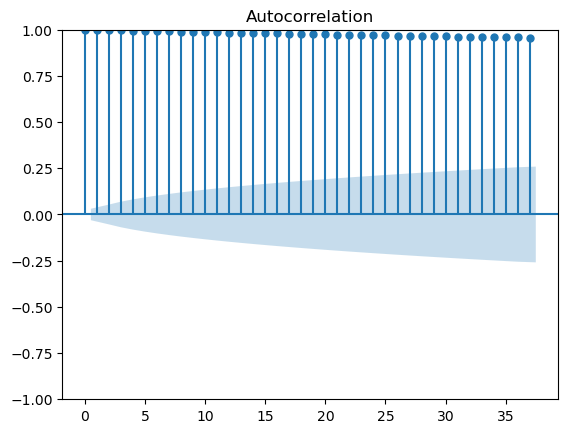

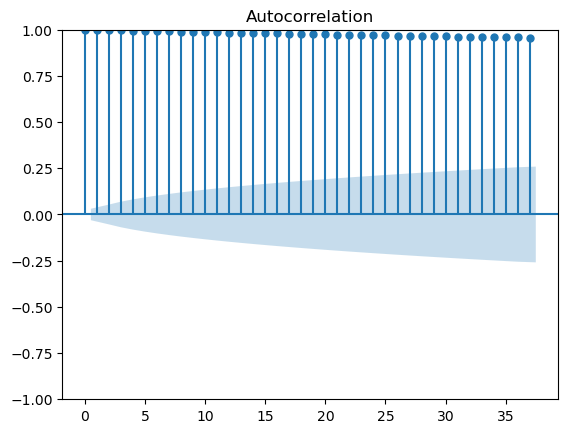

In [16]:
plot_acf(data['Close'].dropna())

In [17]:
#train and test split

train_data = data.iloc[:3700]
test_data = data.iloc[3700:]

In [18]:
#arima model
from statsmodels.tsa.arima.model import ARIMA

In [19]:
model = ARIMA(data['Close'], order=(1,0,1))

c:\Users\mouni\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mouni\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mouni\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [20]:
model_fit=model.fit()

In [21]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3992
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -24297.488
Date:                Fri, 13 Sep 2024   AIC                          48602.976
Time:                        23:50:58   BIC                          48628.144
Sample:                             0   HQIC                         48611.898
                               - 3992                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9286.9183      0.058   1.61e+05      0.000    9286.805    9287.031
ar.L1          0.9999      0.000   5041.573      0.000       1.000       1.000
ma.L1          0.0385      0.009      4.315      0.000       0.021       0.056
sigma2      1.131e+04    111.076    101.779      0.000    1.11e+04    1.15e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             16864.80
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               3.62   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.93e+19. Standard errors may be unstable.
"""

In [22]:
pred_start_date= test_data.index[0]
pred_end_date = test_data.index[-1]

In [23]:
prediction = model_fit.predict(pred_start_date, pred_end_date)
prediction

Date
2022-10-25    17735.991574
2022-10-27    17652.569971
2022-10-28    17739.480545
2022-10-31    17787.900416
2022-11-01    18020.096596
                  ...     
2023-12-22    21258.562214
2023-12-26    21351.873203
2023-12-27    21443.762147
2023-12-28    21661.824801
2023-12-29    21782.138384
Name: predicted_mean, Length: 292, dtype: float64

<Axes: xlabel='Date'>

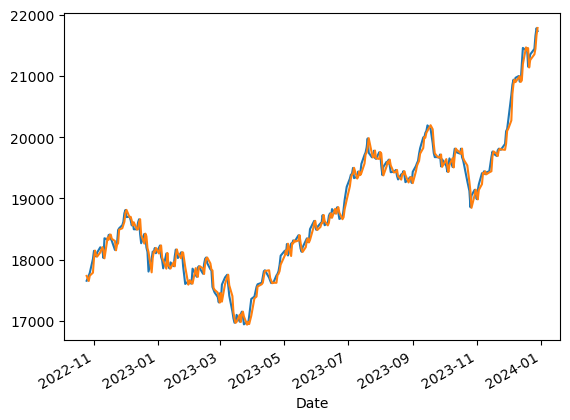

In [24]:
data['Close'].loc['2022-10-25':'2023-12-29'].plot()
prediction.plot()

In [25]:
test_data['prediction']= prediction

In [26]:
test_data[['prediction', 'Close']]

,prediction,Close
Date,,
2022-10-25,17735.991574,17656.349609
2022-10-27,17652.569971,17736.949219
2022-10-28,17739.480545,17786.800781
2022-10-31,17787.900416,18012.199219
2022-11-01,18020.096596,18145.400391
...,...,...
2023-12-22,21258.562214,21349.400391
2023-12-26,21351.873203,21441.349609
2023-12-27,21443.762147,21654.750000


In [27]:
from prophet import Prophet

pdata = pd.read_csv('nifty_historical_data.csv')
pdata.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0


In [28]:
pr_data= pdata[['Date', 'Close']]

In [29]:
pr_data['Date']=pd.to_datetime(pr_data['Date'])
pr_data.columns = ['ds', 'y']

In [30]:
p_model = Prophet()
p_model.fit(pr_data)
future = p_model.make_future_dataframe(periods=365)


23:50:59 - cmdstanpy - INFO - Chain [1] start processing
23:51:00 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
prediction= p_model.predict(future)

In [32]:
prediction[['ds', 'yhat']]

,ds,yhat
0,2007-09-17,6073.375620
1,2007-09-18,6069.611484
2,2007-09-19,6048.886369
3,2007-09-20,6048.711846
4,2007-09-21,6015.665179
...,...,...
4352,2024-12-24,22668.490816
4353,2024-12-25,22668.827772
4354,2024-12-26,22690.646144
4355,2024-12-27,22680.391710


In [33]:
p_model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

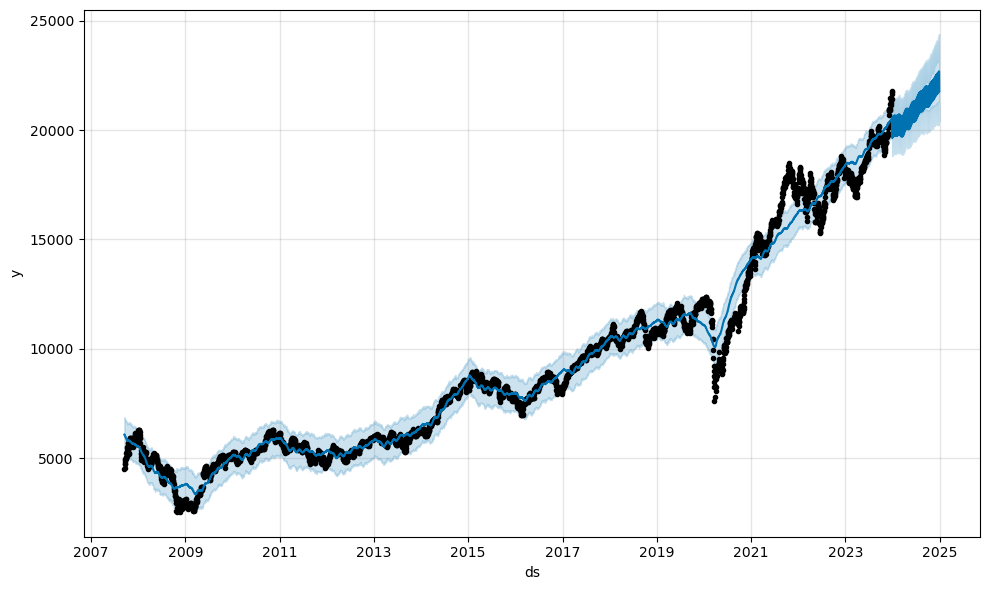

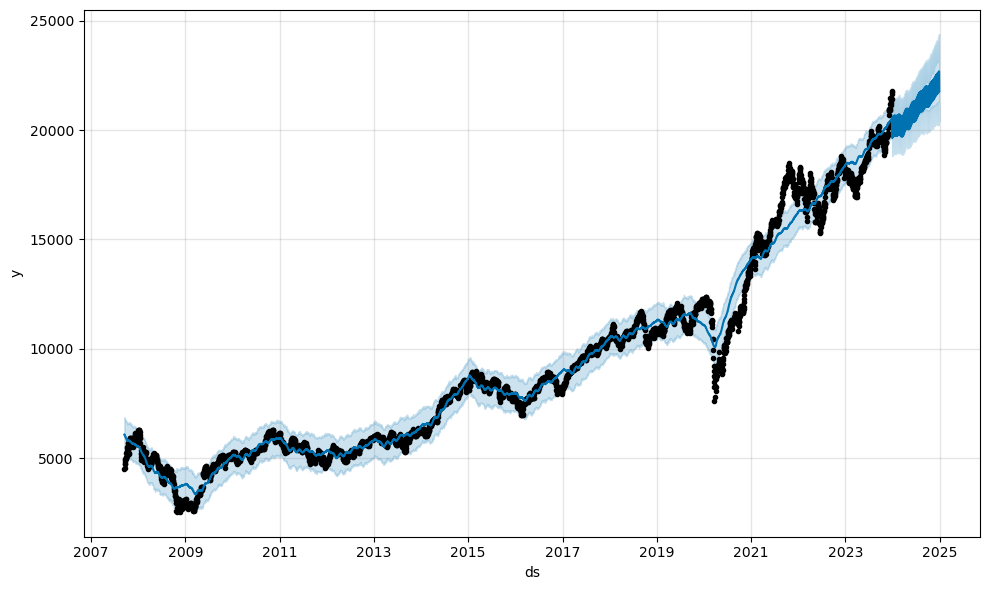

In [34]:
p_model.plot(prediction)

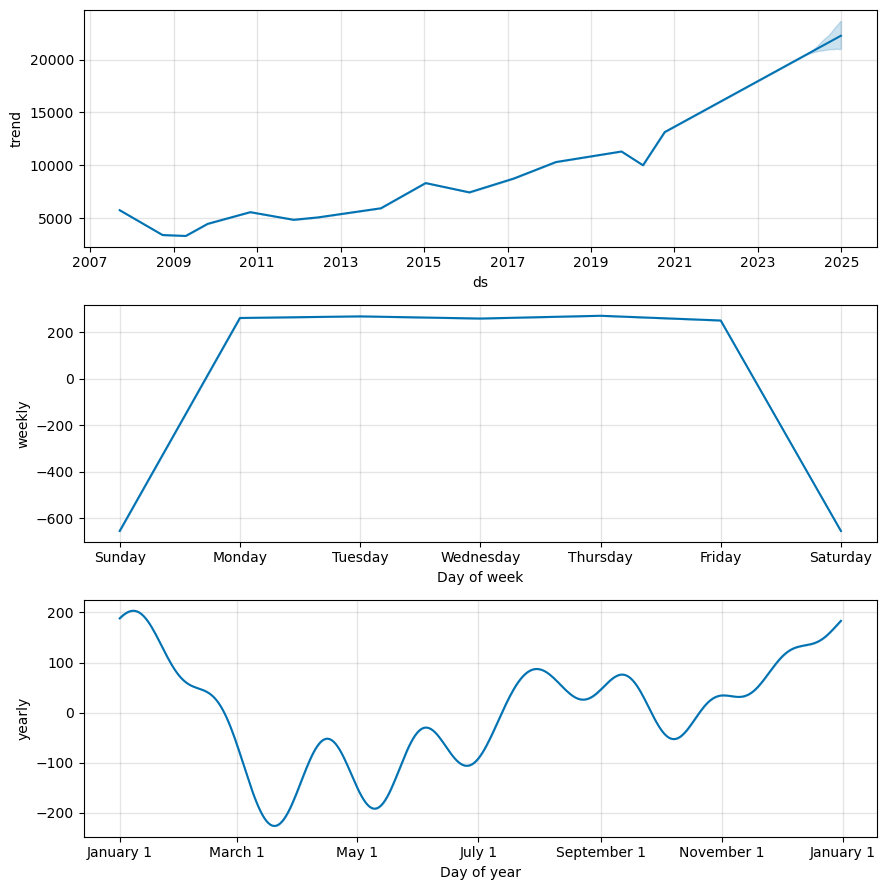

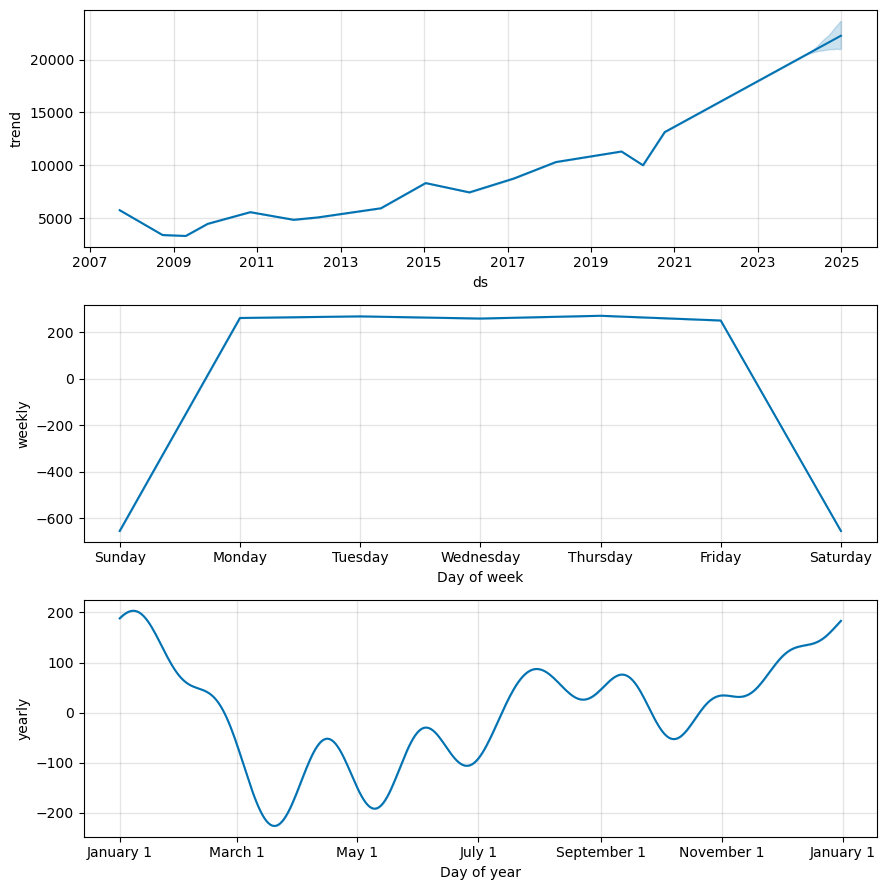

In [35]:
p_model.plot_components(prediction)

In [36]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(p_model, initial='730 days', period='180 days', horizon='365 days' )
df_cv.head()

  0%|          | 0/27 [00:00<?, ?it/s]

23:51:02 - cmdstanpy - INFO - Chain [1] start processing
23:51:02 - cmdstanpy - INFO - Chain [1] done processing
23:51:02 - cmdstanpy - INFO - Chain [1] start processing
23:51:02 - cmdstanpy - INFO - Chain [1] done processing
23:51:03 - cmdstanpy - INFO - Chain [1] start processing
23:51:03 - cmdstanpy - INFO - Chain [1] done processing
23:51:03 - cmdstanpy - INFO - Chain [1] start processing
23:51:03 - cmdstanpy - INFO - Chain [1] done processing
23:51:03 - cmdstanpy - INFO - Chain [1] start processing
23:51:04 - cmdstanpy - INFO - Chain [1] done processing
23:51:04 - cmdstanpy - INFO - Chain [1] start processing
23:51:04 - cmdstanpy - INFO - Chain [1] done processing
23:51:04 - cmdstanpy - INFO - Chain [1] start processing
23:51:04 - cmdstanpy - INFO - Chain [1] done processing
23:51:05 - cmdstanpy - INFO - Chain [1] start processing
23:51:05 - cmdstanpy - INFO - Chain [1] done processing
23:51:05 - cmdstanpy - INFO - Chain [1] start processing
23:51:05 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-03-08,4874.919930,4651.685687,5104.249141,5124.000000,2010-03-07
1,2010-03-09,4875.640943,4663.873672,5092.546430,5101.500000,2010-03-07
2,2010-03-10,4872.398214,4642.621501,5113.540428,5116.250000,2010-03-07
3,2010-03-11,4864.288127,4636.872129,5086.633687,5133.399902,2010-03-07
4,2010-03-12,4865.452962,4638.806393,5078.587824,5137.000000,2010-03-07


In [37]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,1.082725e+06,1040.540892,768.805288,0.077025,0.071384,0.078046,0.317621
1,38 days,1.100690e+06,1049.137671,774.375057,0.077692,0.072019,0.078779,0.315053
2,39 days,1.110628e+06,1053.863401,777.782783,0.078228,0.072417,0.079316,0.313874
3,40 days,1.131163e+06,1063.561682,782.792299,0.078518,0.073147,0.079680,0.312405
4,41 days,1.149867e+06,1072.318390,787.627757,0.078913,0.073669,0.080122,0.312366
...,...,...,...,...,...,...,...,...
324,361 days,3.814185e+06,1952.993966,1472.886133,0.147648,0.094830,0.151766,0.596385
325,362 days,3.826675e+06,1956.188919,1471.238008,0.147462,0.096230,0.151616,0.599092
326,363 days,3.818806e+06,1954.176572,1466.959507,0.146910,0.094679,0.151170,0.600941
327,364 days,3.828355e+06,1956.618246,1466.019125,0.146779,0.094830,0.151036,0.602436


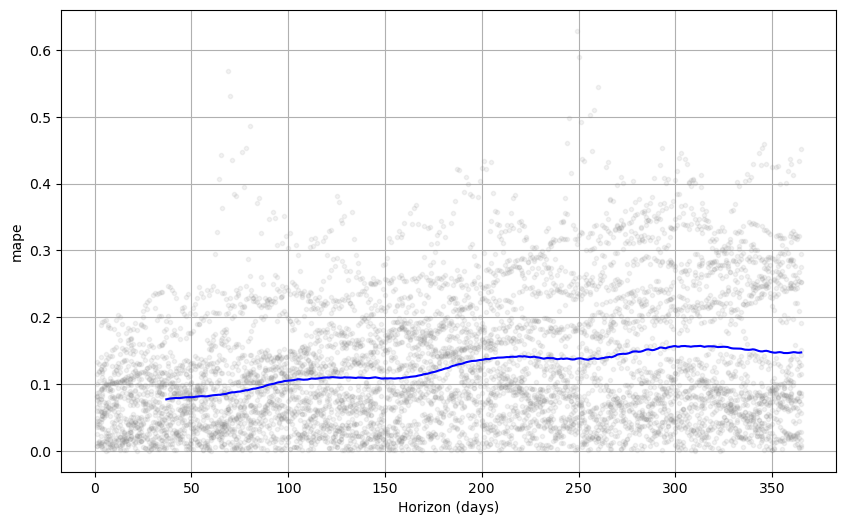

In [38]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [39]:
#saving predictions in a csv file
prediction[['ds','yhat']].to_csv('pred.csv')

In [40]:
#getting date from user and showing predicted close value
given_date=input()

p=prediction[['yhat']].loc[(prediction['ds'] == given_date)].values
p[0]


array([20589.77168737])